In [1]:
#このセルは一回実行すればok
%cd /content/drive/MyDrive/tasks
!mkdir colab_modules
%cd colab_modules
!git clone https://github.com/duckietown/gym-duckietown.git
%cd gym-duckietown
# モジュールの永続化
import os, sys
nb_path = '/content/drive/MyDrive/tasks/colab_modules/'
sys.path.insert(0,nb_path)
!pip install pyvirtualdisplay --target /content/drive/MyDrive/tasks/colab_modules/

nb_path = '/content/drive/MyDrive/tasks/colab_modules/gym-duckietown'
sys.path.insert(0,nb_path)
!pip3 install -e .

/content/drive/MyDrive/tasks
mkdir: cannot create directory ‘colab_modules’: File exists
/content/drive/MyDrive/tasks/colab_modules
fatal: destination path 'gym-duckietown' already exists and is not an empty directory.
/content/drive/MyDrive/tasks/colab_modules/gym-duckietown
Obtaining file:///content/drive/MyDrive/tasks/colab_modules/gym-duckietown
  Attempting uninstall: duckietown-gym-daffy
    Found existing installation: duckietown-gym-daffy 6.1.31
    Can't uninstall 'duckietown-gym-daffy'. No files were found to uninstall.
  Running setup.py develop for duckietown-gym-daffy


In [1]:
#!cp -RT /content/drive/MyDrive/final-task/env /content/drive/MyDrive/tasks/final-task/env #envのインポート方法が分からなかった

パスは変えてください

# trainer.py

##### nvidia-smi

In [1]:
!nvidia-smi

Mon Apr 11 13:38:20 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
%cd /content/drive/MyDrive/tasks
import sys
sys.path.append ('/content/drive/MyDrive/tasks/colab_modules/')
!apt-get install python-opengl -y
!apt install xvfb -y
!apt-get install x11-utils -y
from pyvirtualdisplay import Display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
def create_display():
    display = Display(visible=0, size=(1400, 900))
    display.start()
    if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
        !sh xvfb start
        %env DISPLAY=:1
create_display()

/content/drive/MyDrive/tasks
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 0s (1,812 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 39 not u

In [3]:
%cd /content/drive/MyDrive/tasks/final-task
from utils.env import launch_env

from utils.wrappers import (
    NormalizeWrapper,
    ImgWrapper,
    DtRewardWrapper,
    ActionWrapper,
    ResizeWrapper,
    EarlyStopWrapper,
)

from dreamer.config import DreamerConfig
import torch
from dreamer.trainer import Trainer

/content/drive/MyDrive/tasks/final-task


DEBUG:commons:version: 6.2.4 *
DEBUG:typing:version: 6.2.3
DEBUG:duckietown_world:duckietown-world version 6.2.38 path /content/drive/MyDrive/tasks/colab_modules
DEBUG:geometry:PyGeometry-z6 version 2.1.4 path /content/drive/MyDrive/tasks/colab_modules
DEBUG:aido_schemas:aido-protocols version 6.0.59 path /content/drive/MyDrive/tasks/colab_modules
DEBUG:nodes:version 6.2.13 path /content/drive/MyDrive/tasks/colab_modules pyparsing 3.0.7
DEBUG:gym-duckietown:gym-duckietown version 6.1.31 path /content/drive/MyDrive/tasks/colab_modules



{'audio': ('directsound', 'openal', 'pulse', 'silent'), 'debug_font': False, 'debug_gl': True, 'debug_gl_trace': False, 'debug_gl_trace_args': False, 'debug_graphics_batch': False, 'debug_lib': False, 'debug_media': False, 'debug_texture': False, 'debug_trace': False, 'debug_trace_args': False, 'debug_trace_depth': 1, 'debug_trace_flush': True, 'debug_win32': False, 'debug_x11': False, 'graphics_vbo': True, 'shadow_window': True, 'vsync': None, 'xsync': True, 'xlib_fullscreen_override_redirect': False, 'darwin_cocoa': True, 'search_local_libs': True}


##### Train

In [4]:
env = launch_env(map_name="loop_pedestrians")
env = ResizeWrapper(env)
# env = NormalizeWrapper(env)
env = ImgWrapper(env)  # to make the images from 120x160x3 into 3x120x160
env = ActionWrapper(env)
#env = DtRewardWrapper(env)
env = EarlyStopWrapper(env)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
config = DreamerConfig()
trainer = Trainer(env, device, config)

trainer.train()

INFO:gym-duckietown:Information about the graphics card:
 pyglet_version: 1.5.0
    information: dict[4]
                 │ vendor: VMware, Inc.
                 │ renderer: llvmpipe (LLVM 10.0.0, 256 bits)
                 │ version: 3.1 Mesa 20.0.8
                 │ shading-language-version: 1.40
  nvidia_around: True
DEBUG:gym-duckietown:Falling back to non-multisampled frame buffer
DEBUG:gym-duckietown:Falling back to non-multisampled frame buffer
INFO:duckietown_world: data: /content/drive/MyDrive/tasks/colab_modules/duckietown_world/data
DEBUG:commons.fs:9.6 s for locate_files(/content/drive/MyDrive/tasks/colab_modules/duckietown_world/data,['*.png', '*.jpg', '*.yaml', '*.gltf', '*.obj', '*.mtl', '*.json', '*.tga', '*.bmp']): 106 traversed, found 1105 filenames (1105 uniques)
DEBUG:gym-duckietown:loading map file "/content/drive/MyDrive/tasks/colab_modules/duckietown_world/data/gd1/maps/loop_pedestrians.yaml"
INFO:gym-duckietown:done
DEBUG:gym-duckietown:loading mesh 'duckiebot'

episode [   6/ 500] is collected. Total reward is -1128.335503
elasped time for interaction: 24.92s
update_step:   1 model loss: 3293.08911, kl_loss: 3.00000, obs_loss: 3289.56763, reward_loss: 0.52148, value_loss: 0.00976 action_loss: 0.14431
update_step:   2 model loss: 3204.54346, kl_loss: 3.00000, obs_loss: 3199.80713, reward_loss: 1.73636, value_loss: 0.03499 action_loss: 0.27823
update_step:   3 model loss: 3171.32397, kl_loss: 3.00000, obs_loss: 3167.54126, reward_loss: 0.78265, value_loss: 0.07671 action_loss: 0.41189
update_step:   4 model loss: 3124.41357, kl_loss: 3.00000, obs_loss: 3120.49609, reward_loss: 0.91743, value_loss: 0.13714 action_loss: 0.54933
update_step:   5 model loss: 3195.46533, kl_loss: 3.00000, obs_loss: 3191.80908, reward_loss: 0.65620, value_loss: 0.21591 action_loss: 0.68948
update_step:   6 model loss: 3022.98901, kl_loss: 3.00000, obs_loss: 3019.31128, reward_loss: 0.67763, value_loss: 0.31599 action_loss: 0.83452
update_step:   7 model loss: 3101.21

DEBUG:gym-duckietown:[2.06827402 0.         1.20575019] corresponds to tile at (3, 2) which is not drivable: {'coords': (3, 2), 'kind': 'floor', 'angle': 1, 'drivable': False, 'texture': <gym_duckietown.graphics.Texture object at 0x7f3db0dfcf50>, 'color': array([1, 1, 1, 1])}
DEBUG:gym-duckietown:Invalid pose. Collision free: True On drivable area: False
DEBUG:gym-duckietown:safety_factor: 1.3
DEBUG:gym-duckietown:pos: [2.14748543 0.         1.14890123]
DEBUG:gym-duckietown:l_pos: [2.06827402 0.         1.20575019]
DEBUG:gym-duckietown:r_pos: [2.22669683 0.         1.09205228]
DEBUG:gym-duckietown:f_pos: [2.07926668 0.         1.05384755]
DEBUG:gym-duckietown:[2.12282209 0.         1.20893799] corresponds to tile at (3, 2) which is not drivable: {'coords': (3, 2), 'kind': 'floor', 'angle': 1, 'drivable': False, 'texture': <gym_duckietown.graphics.Texture object at 0x7f3db0dfcf50>, 'color': array([1, 1, 1, 1])}
DEBUG:gym-duckietown:Invalid pose. Collision free: True On drivable area: Fa

episode [   7/ 500] is collected. Total reward is -1867.421874
elasped time for interaction: 69.74s
update_step:   1 model loss: 697.11450, kl_loss: 3.00000, obs_loss: 693.58063, reward_loss: 0.53390, value_loss: 0.35966 action_loss: 4.89229


KeyboardInterrupt: ignored

### tensorboard

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/drive/MyDrive/tasks/final-task/runs/20220411134128

### 可視化

In [ ]:
path = '/content/drive/MyDrive/tasks/final-task/models/20220409092027/episode_0100'
env = launch_env(map_name="loop_pedestrians")
env = ResizeWrapper(env)
# env = NormalizeWrapper(env)
env = ImgWrapper(env)  # to make the images from 120x160x3 into 3x120x160
env = ActionWrapper(env)
# env = DtRewardWrapper(env)
env = EarlyStopWrapper(env)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
config = DreamerConfig()
trainer = Trainer(env, device, config, False)
trainer.load_models(path)

trainer.view(1)

INFO:gym-duckietown:Information about the graphics card:
 pyglet_version: 1.5.0
    information: dict[4]
                 │ vendor: VMware, Inc.
                 │ renderer: llvmpipe (LLVM 10.0.0, 256 bits)
                 │ version: 3.1 Mesa 20.0.8
                 │ shading-language-version: 1.40
  nvidia_around: True
DEBUG:gym-duckietown:Falling back to non-multisampled frame buffer
DEBUG:gym-duckietown:Falling back to non-multisampled frame buffer
INFO:duckietown_world: data: /usr/local/lib/python3.7/dist-packages/duckietown_world/data
DEBUG:gym-duckietown:loading map file "/usr/local/lib/python3.7/dist-packages/duckietown_world/data/gd1/maps/loop_pedestrians.yaml"
INFO:gym-duckietown:done
DEBUG:gym-duckietown:loading mesh 'duckiebot' from file_path '/usr/local/lib/python3.7/dist-packages/duckietown_world/data/gd1/meshes/duckiebot/duckiebot.obj'
DEBUG:gym-duckietown:loading materials from /usr/local/lib/python3.7/dist-packages/duckietown_world/data/gd1/meshes/duckiebot/duckiebot.m

# dukietownの可視化

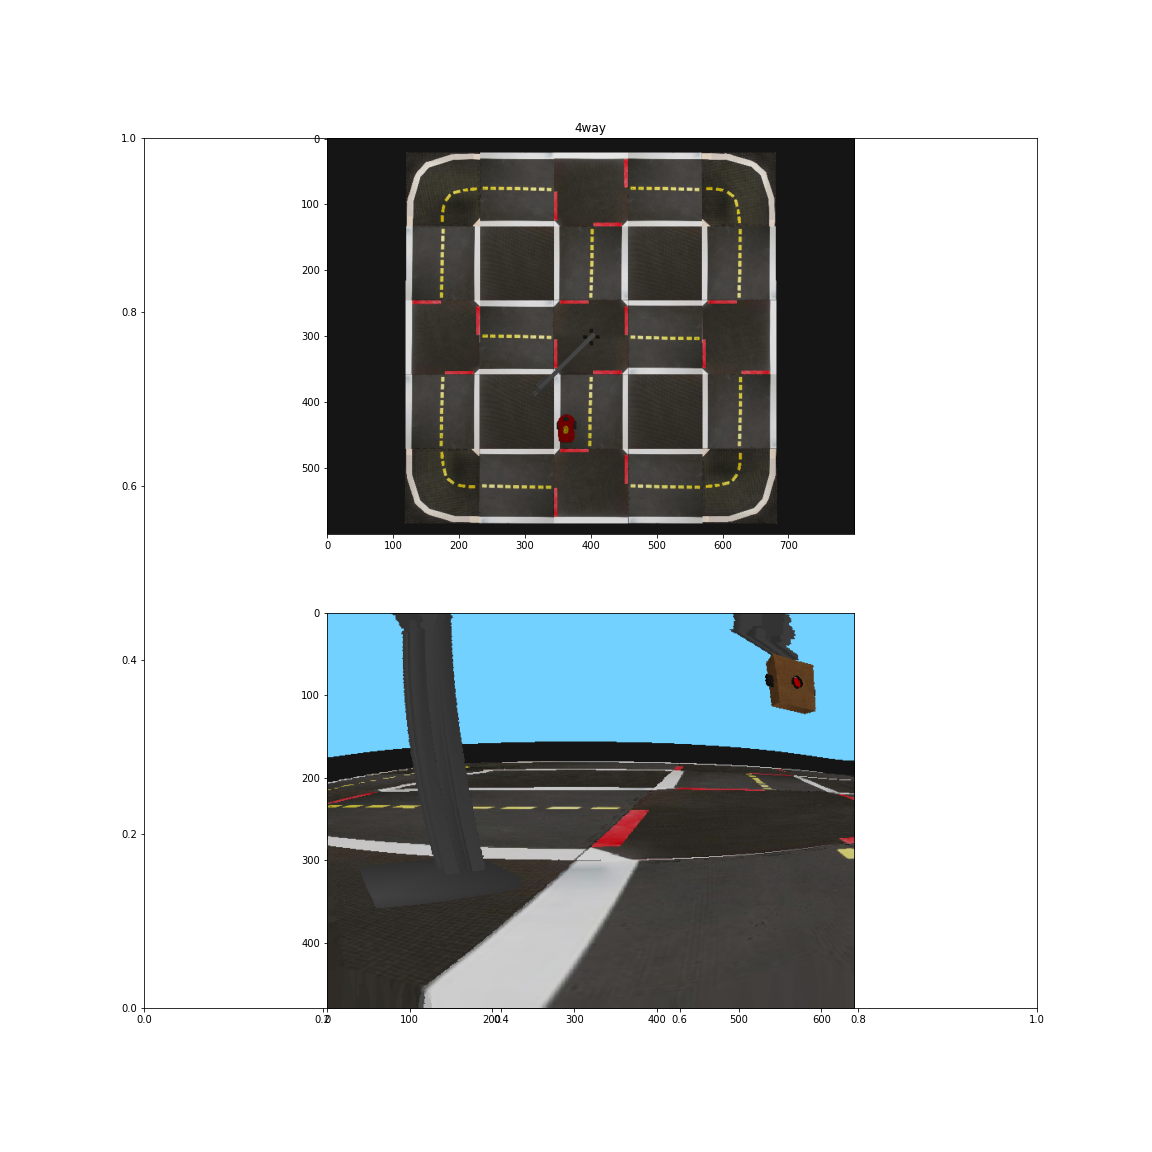

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

path = '/content/drive/MyDrive/final-task/4way.png'
# 画像ファイルパスから読み込み
img = cv2.imread(path)
cv2_imshow(img)